In [1]:
import nilearn
from nilearn import datasets, plotting
import os
import requests
import csv
import pandas as pd
import nibabel as nib
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import scipy
from scipy.stats import multivariate_normal
from scipy.spatial.distance import pdist, squareform
from networkx.drawing.nx_agraph import graphviz_layout
from sklearn.metrics.cluster import mutual_info_score
from scipy.sparse.csgraph import minimum_spanning_tree
from collections import deque, defaultdict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

In [ ]:
# load saved covariance for entire dataset
home_base_dir = '/Users/aj/dmello_lab/fmri_connectivity_trees' # directory where repository lives at home computer
lab_base_dir = '/Users/ajjain/Downloads/Code/fmri_connectivity_trees' # directory where repository lives at lab computer

# set base directory depending on where the code is being run
base_dir = home_base_dir if os.path.exists(home_base_dir) else lab_base_dir

metric = "covariance"
cov_path = f'{base_dir}/code/functional_connectivity/abide/output/data/gnb/{metric}'

metric = "mutual_info"
mi_path = f'{base_dir}/code/functional_connectivity/abide/output/data/gnb/{metric}'

metric = "chow_liu"
cl_path = f'{base_dir}/code/functional_connectivity/abide/output/data/gnb/{metric}'

In [3]:
def load_accuracies(metric_path, fraction=0.1):

    accuracy_path = f'{metric_path}/{fraction}/accuracies.csv'
    if not os.path.exists(accuracy_path):
        raise FileNotFoundError(f"Accuracy file not found at {accuracy_path}")
    
    accuracies = pd.read_csv(accuracy_path)

    return accuracies

In [15]:
def train_accuracies(metric_path, fractions=[0.1, 0.2, 0.3, 0.5, 0.7, 1.0]):
    accuracies = {}
    
    for fraction in fractions:
        try:
            accuracies[fraction] = load_accuracies(metric_path, fraction)['Train Accuracy'][0]
        except FileNotFoundError as e:
            print(e)
    
    return accuracies

def test_accuracies(metric_path, fractions=[0.1, 0.2, 0.3, 0.5, 0.7, 1.0]):
    accuracies = {}
    
    for fraction in fractions:
        try:
            accuracies[fraction] = load_accuracies(metric_path, fraction)['Test Accuracy'][0]
        except FileNotFoundError as e:
            print(e)
    
    return accuracies

In [53]:
fractions = [0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 1.0]

cov_train = train_accuracies(cov_path, fractions=fractions)
cov_test = test_accuracies(cov_path, fractions=fractions)
mi_train = train_accuracies(mi_path, fractions=fractions)
mi_test = test_accuracies(mi_path, fractions=fractions)
cl_train = test_accuracies(cl_path, fractions=fractions)
cl_test = test_accuracies(cl_path, fractions=fractions)

In [54]:
minutes = 800 * 5 # total minutes abide
frac_minutes = [minutes * f for f in fractions] # minutes for each fraction
frac_hours = [m / 60 for m in frac_minutes] # hours for each fraction


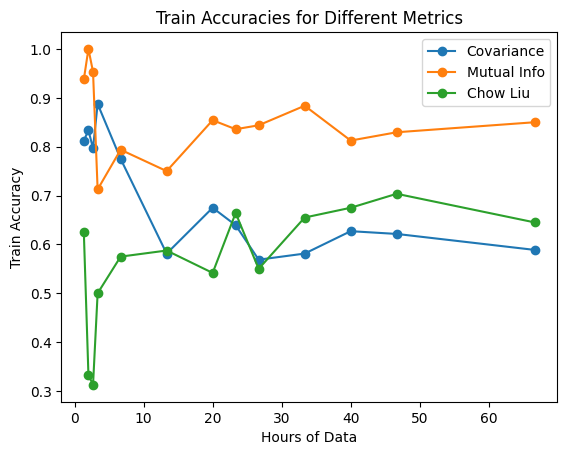

In [55]:
plt.plot(frac_hours, cov_train.values(), marker='o', label='Covariance')
plt.plot(frac_hours, mi_train.values(), marker='o', label='Mutual Info')
plt.plot(frac_hours, cl_train.values(), marker='o', label='Chow Liu')
plt.xlabel('Hours of Data')
plt.ylabel('Train Accuracy')
plt.title('Train Accuracies for Different Metrics')
plt.legend()

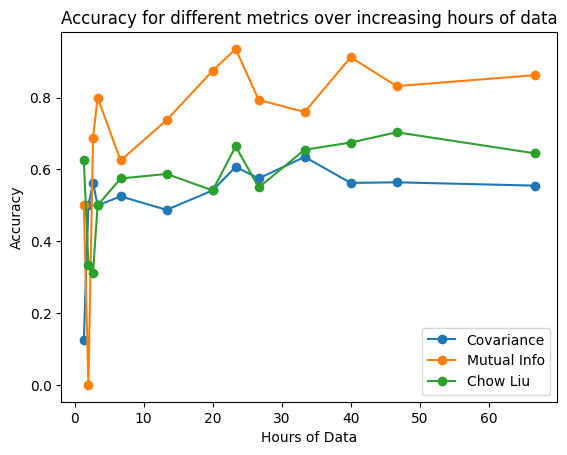

In [56]:
plt.plot(frac_hours, cov_test.values(), marker='o', label='Covariance')
plt.plot(frac_hours, mi_test.values(), marker='o', label='Mutual Info')
plt.plot(frac_hours, cl_test.values(), marker='o', label='Chow Liu')
plt.xlabel('Hours of Data')
plt.ylabel('Accuracy')
plt.title('Accuracy for different metrics over increasing hours of data') 
plt.legend()